In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4):
    """
    Cria um dataset bidimensional binário com
    inclinação e interceptação do eixo vertical
    parametrizados.
    """
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.99281019, 0.76276216],
        [0.23952015, 0.62304368],
        [0.04290209, 0.88284128],
        [0.79842928, 0.92748631],
        [0.4456084 , 0.58665012],
        [0.85659068, 0.1273703 ],
        [0.42897996, 0.26900948],
        [0.38794733, 0.74418265],
        [0.02161362, 0.36144238],
        [0.5240693 , 0.67422869],
        [0.56344579, 0.20120452],
        [0.70520707, 0.30135535],
        [0.87684824, 0.85213981],
        [0.55605736, 0.8932628 ],
        [0.34607361, 0.86435858],
        [0.74260642, 0.95078258],
        [0.29227198, 0.70565567],
        [0.1397226 , 0.66673195],
        [0.40997951, 0.73066645],
        [0.69757918, 0.48007826]]),
 array([ 1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        -1, -1,  1]))

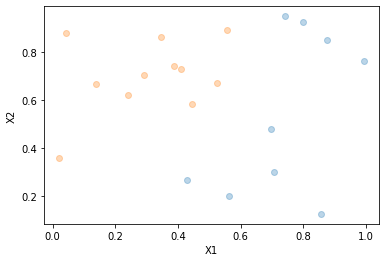

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

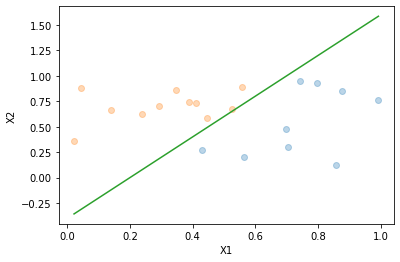

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1


In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[-10.89815146  44.70628096 -22.25639314]


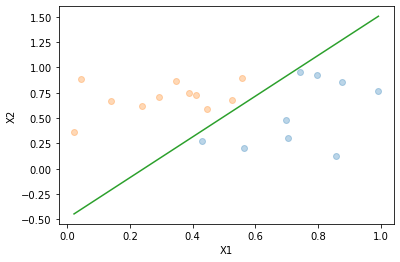

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch, com bias.
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += np.matmul(Xb.T, erros)

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = np.matmul(Xb, self.w)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


In [7]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept)

0.958


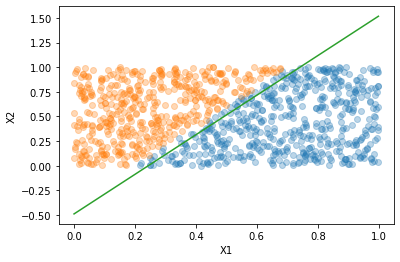

In [8]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
